### Performing Level 2 Corrections and Generating TIFF files for Spectral Modulation

- Level 2 correction is performed by func level2Corr
- The Spectral_Modulation.ipynb is imported to perform spectral modulation 

In [1]:
pip install import_ipynb

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp36-none-any.whl size=2976 sha256=079fab49d629f882f641a8f383ed3474a5b9563954ee2281321f7f2391eb232c
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb


In [21]:
!pip install import-ipynb
import import_ipynb
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [23]:
your_module = drive.CreateFile({'id':'1wmsXiQGCur82zONnX2TwQXmUZ6g45bRz'})

In [24]:
your_module.GetContentFile('Spectral_Modulation.ipynb')

In [25]:

import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks')


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import gdal
import osr
import os
import Spectral_Modulation

importing Jupyter notebook from Spectral_Modulation.ipynb
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bioni

In [27]:
REFLECTANCE_MULT = [(0.00002, 0.00002, 0.00002, 0.00002, 0.00002, 0.00002, 0.00002, 0.00002, 0.00002,)]
REFLECTANCE_ADD = [(-0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1,)]

Level 2 Correction of images is performed using above values 

REFLECTANCE_MULT = [(0.00002, 0.00002, 0.00002, 0.00002, 0.00002, 0.00002, 0.00002, 0.00002, 0.00002,)]

REFLECTANCE_ADD = [(-0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1,)]

In [30]:
from Spectral_Modulation import readBand
def level2Corr(inputPath,band_name):
  band=readBand(band_name,inputPath)
  mult = 0.00002
  add = -0.1
  rows, cols = band[0].shape
  corrected_img = np.zeros((rows,cols),dtype=np.float64)
  for row in tqdm(range(rows)):
    for col in range(cols):
      corrected_img[row][col] = mult*band[0][row][col] + add
  plt.figure()
  plt.imshow(corrected_img)
  return corrected_img,band[1],band[2],band[3]      
  #writeBand(corrected_img, band[2], band[1], '/content/drive/MyDrive/level2image/Chilikha/LC08_L1TP_140046_20181227_20190129_01_T1_'+band_name + '.tif', dtype=gdal.GDT_Float64)
         

The paths are defined for the tiff files for Chilikha lake,Orissa

100%|██████████| 7821/7821 [03:05<00:00, 42.17it/s]


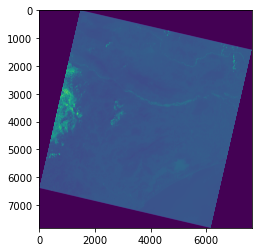

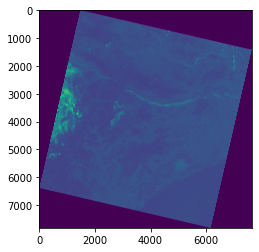

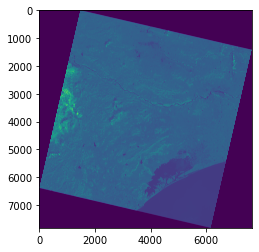

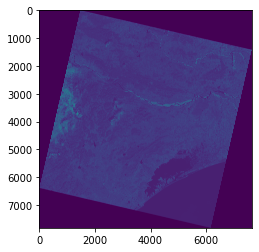

In [31]:
path1='/content/drive/My Drive/Landsat 8/Chilika Lake, Orissa/LC08_L1TP_140046_20181227_20190129_01_T1_B3.TIF'
path2='/content/drive/My Drive/Landsat 8/Chilika Lake, Orissa/LC08_L1TP_140046_20181227_20190129_01_T1_B4.TIF'
path3='/content/drive/My Drive/Landsat 8/Chilika Lake, Orissa/LC08_L1TP_140046_20181227_20190129_01_T1_B5.TIF'
path4='/content/drive/My Drive/Landsat 8/Chilika Lake, Orissa/LC08_L1TP_140046_20181227_20190129_01_T1_B6.TIF'

green=level2Corr(path1,'B3_c')
red=level2Corr(path2,'B4_c')
nir=level2Corr(path3,'B5_c')
swir=level2Corr(path4,'B6_c')

 ### Spectral Modulation is performed using the green,red, near infrared and short wave infrared bands


In [33]:
from Spectral_Modulation import spectral_modulation
spectral_modulation((green, red, nir,swir),'Chilikha')

{'000000': [1, 18467161], '121221': [2, 3052588], '122221': [3, 24449520], '002022': [4, 1429], '112022': [5, 259], '122222': [6, 4669987], '222222': [7, 1683241], '120221': [8, 6732], '121211': [9, 1282914], '121201': [10, 1867], '022222': [11, 10022], '122220': [12, 5358], '222221': [13, 674882], '111022': [14, 96], '111111': [15, 5250370], '111211': [16, 202336], '111122': [17, 984], '022221': [18, 1944], '221211': [19, 92661], '222211': [20, 40344], '211111': [21, 7407], '112122': [22, 325], '111011': [23, 395], '111221': [24, 4551], '021211': [25, 230], '221111': [26, 900], '101211': [27, 363], '222220': [28, 169], '112222': [29, 3874], '111222': [30, 2430], '111201': [31, 15], '101221': [32, 13], '011111': [33, 27], '222201': [34, 114], '102222': [35, 15], '220211': [36, 109], '111220': [37, 6], '110122': [38, 1], '222112': [39, 2], '111112': [40, 560], '111102': [41, 3], '111110': [42, 9], '110222': [43, 3], '211112': [44, 3], '020201': [45, 311], '212112': [46, 13], '212122': [

The paths are defined for the tiff files for Chilikha lake,Orissa

100%|██████████| 7751/7751 [02:58<00:00, 43.34it/s]


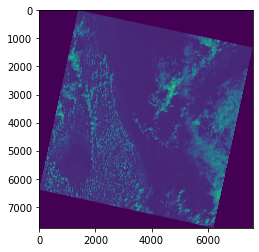

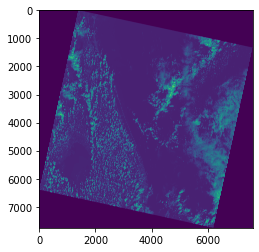

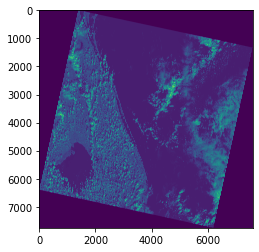

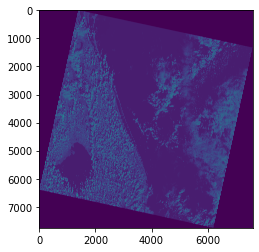

In [34]:
path1='/content/drive/MyDrive/Landsat 8/Okeechobee Lake, Florida/LC08_L1TP_015041_20181113_20181127_01_T1_B3.TIF'
path2='/content/drive/MyDrive/Landsat 8/Okeechobee Lake, Florida/LC08_L1TP_015041_20181113_20181127_01_T1_B4.TIF'
path3='/content/drive/MyDrive/Landsat 8/Okeechobee Lake, Florida/LC08_L1TP_015041_20181113_20181127_01_T1_B5.TIF'
path4='/content/drive/MyDrive/Landsat 8/Okeechobee Lake, Florida/LC08_L1TP_015041_20181113_20181127_01_T1_B6.TIF'
green  = level2Corr( path1,'B3')
red  = level2Corr(path2,'B4')
nir  = level2Corr(path3,'B5')
swir  = level2Corr( path4,'B6')


### Spectral Modulation is performed using the green,red, near infrared and short wave infrared bands


In [35]:
spectral_modulation((green, red, nir,swir),'Okeechobe')

{'000000': [1, 17455858], '122221': [2, 6640452], '002022': [3, 1382], '222221': [4, 1043909], '121221': [5, 1385351], '122222': [6, 369695], '112022': [7, 387], '111111': [8, 21410581], '111211': [9, 1264888], '121211': [10, 2559488], '222211': [11, 204526], '111112': [12, 384966], '111122': [13, 222416], '111222': [14, 63118], '111221': [15, 57733], '222222': [16, 139417], '112122': [17, 45438], '112222': [18, 87114], '221211': [19, 5539523], '211111': [20, 5094], '111201': [21, 429], '111011': [22, 5536], '120221': [23, 1857], '022222': [24, 442], '022221': [25, 2096], '101211': [26, 3146], '222220': [27, 71], '111110': [28, 2385], '212122': [29, 48], '111220': [30, 291], '111022': [31, 562], '102222': [32, 215], '221111': [33, 5449], '111102': [34, 831], '121201': [35, 2341], '220211': [36, 486], '021211': [37, 5901], '101221': [38, 172], '122220': [39, 444], '222111': [40, 11], '222122': [41, 19], '211112': [42, 39], '222201': [43, 382], '110222': [44, 188], '011111': [45, 62], '2